In [3]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

- references
    - https://cwkx.github.io/data/teaching/dl-and-rl/dl-lecture5.pdf
    - https://docs.mlinpl.org/conference/2019/slides/jakub_tomczak_mlinpl2019.pdf

## 概率建模

In [47]:
Image(url='../imgs/P(X,Y).png', width=400)

- learning data distribution（$P(X,Y)$）
    - $P(Y|X)$：y 为label，典型的判别式模型（Discriminative model），比如分类问题；
    - $P(X|Y)$：conditional generative model，一般是跨模态的条件生成，比如文生图；
    - $P(X,Y)$：joint distribution，联合概率分布，对应 **generative model**；
        - Generative models learn a joint distribution over the entire dataset. They are mostly used for sampling applications or density estimation
        - 我学人工智能的时候，generative model 还比较小众，而现在基本席卷一切，我个人把 generative ai（生成式AI）称之为 modern ai；
    - 所以基本上，概率建模基本上是所有人工智能的底层原理；
- 概率建模视角下回看 language model，是一个 joint distribution

$$
P(\mathbf{w}) = P(w_1, w_2, \ldots, w_n) = \prod_{i=1}^n P(w_i | w_1, w_2, \ldots, w_{i-1}) 
$$

- 关于现代人工智能的数学基础
    - 矩阵对应着作为 modern ai 标准数据结构的高维 tensor，确定性计算；
    - 概率：相对比较抽象的概率建模，随机性的世界；

In [51]:
Image(url='../imgs/Discriminative_vs_Generative.jpeg', width=400)

In [55]:
# p_\theta(x) prior 或者这个 input 出现的概率较低（对于这个数据集而言，data distribution）
Image(url='../imgs/Generative_vs_Discriminative.png', width=500)

## LR vs. Naive Bayes

- Dog vs. Cat classifier
- Discriminative Classifier (Logistic Regression)

    $$
    \hat c={\arg\max}_{c\in \mathcal C} \overbrace{p(c|x)}^{\text{posterior}}
    $$

- Generative Classifier（Naive Bayes）

    $$
    \hat c={\arg\max}_{c\in \mathcal C} \overbrace{p(x|c)}^{\text{likelihood}}\overbrace{p(c)}^{\text{prior}}
    $$

    - build a model for Dog
    - build a model for Cat
    - given a new image, Run both models and see which one fits better

$$
\begin{split}
p(C_1|x)&=\frac{p(C_1)p(x|C_1)}{p(C_1)p(x|C_1)+p(C_2)p(x|C_2)}\\
&=\frac{1}{1+\exp(-z)},\quad z = \ln\frac{p(C_1)p(x|C_1)}{p(C_2)p(x|C_2)}
\end{split}
$$

- generative model, class-conditionals，$z = \ln\frac{p(C_1)p(x|C_1)}{p(C_2)p(x|C_2)}$
- discriminative model，$z=\textbf w^Tx$

In [2]:
Image(url='../imgs/posterior.png', width=400)

## density estimation

- 密度估计，就是概率密度估计，pde（probability density estimation）
    - 密度，通俗地理解，就是概率值的高低，概率值越高，如果采样的话，点数就越密集；
    - 反之，概率密度越低的地方，数据点在该区域出现的频率越低，采样点也会更稀疏。
- Generative models learn a joint distribution over the entire dataset. They are mostly used for
    - sampling applications (generative) $\mathbf x_{\text{new}}\sim p_{\text{model}}(\mathbf x)$
    - density estimation: $p_{\text {model}}(\mathbf x')$

In [4]:
Image(url='../imgs/two_applications.png', width=400)

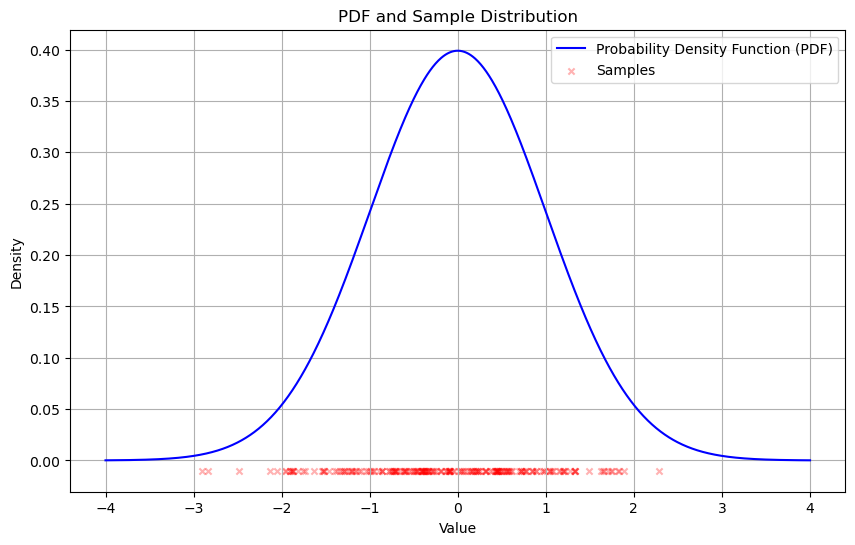

In [49]:
# 定义正态分布的参数
mu, sigma = 0, 1  # 均值为0，标准差为1

# 生成从正态分布中采样的点
sample_size = 200
samples = np.random.normal(mu, sigma, sample_size)

# 生成用于绘制 PDF 的点
x = np.linspace(-4, 4, 1000)
pdf = norm.pdf(x, mu, sigma)

# 绘制 PDF 曲线
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Probability Density Function (PDF)', color='blue')

# 在横轴上绘制采样点
plt.scatter(samples, np.zeros(sample_size) - 0.01, alpha=0.3, marker='x', color='red', s=20, label='Samples')

plt.title('PDF and Sample Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

## cdf samping

In [40]:
Image(url='../imgs/cdf_sampling.png', width=600)

- 从 0-1 均匀分布中进行采样 $z\sim U[0,1]$
    - 因为 cdf 的取值就在 0-1 之间（类 sigmoid 函数）
- 需要知道 $F^{-1}_X(z)$，采样得到的 $z$ 代入这个逆函数，相当于从原函数中进行采样 $f_X(\mathbf x)$ 

$$
\text{ppf}(p)=F^{-1}(p)=x
$$
- PPF（Percent Point Function），也称为逆累积分布函数（Inverse Cumulative Distribution Function）或分位数函数（Quantile Function），是CDF的反函数。
    - 对于一个给定的概率 $p$，ppf 返回一个值 $x$（样本点），使得 $P(X\leq x)=p$

In [1]:
# 生成均匀分布的随机数
num_samples = 1000
uniform_samples = np.random.uniform(0, 1, num_samples)

In [9]:
# 计算正态分布的反函数（即其分位数函数）
normal_samples = norm.ppf(uniform_samples)
np.mean(normal_samples), np.std(normal_samples)

(-0.009352626854154267, 1.007274631856921)

(-4.0, 4.0)

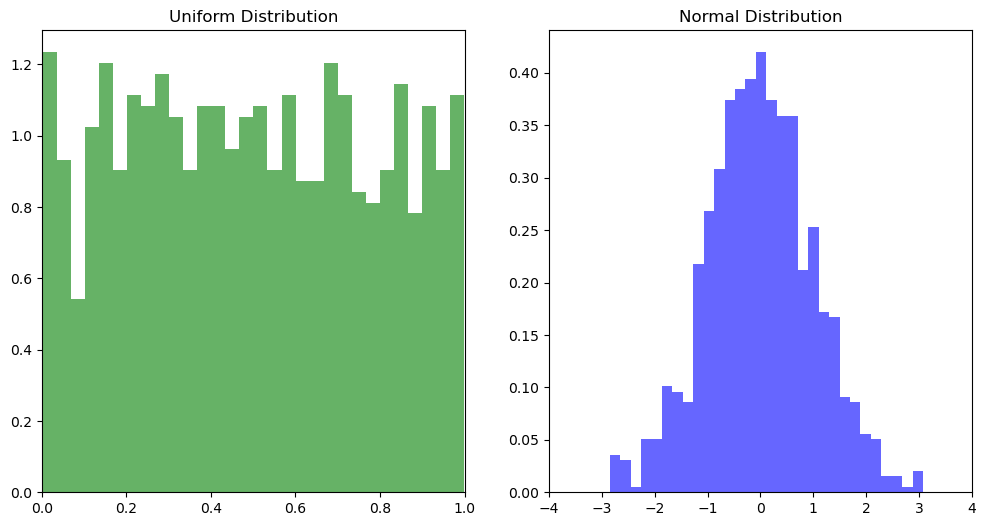

In [7]:
# 可视化均匀分布和转换后的正态分布
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 均匀分布的直方图
axs[0].hist(uniform_samples, bins=30, density=True, alpha=0.6, color='g')
axs[0].set_title('Uniform Distribution')
axs[0].set_xlim(0, 1)

# 正态分布的直方图
axs[1].hist(normal_samples, bins=30, density=True, alpha=0.6, color='b')
axs[1].set_title('Normal Distribution')
axs[1].set_xlim(-4, 4)

In [11]:
# 计算正态分布的反函数（即其分位数函数）
normal_samples = norm.ppf(uniform_samples, loc=1, scale=2)
np.mean(normal_samples), np.std(normal_samples)

(0.9812947462916914, 2.014549263713842)

(-6.0, 6.0)

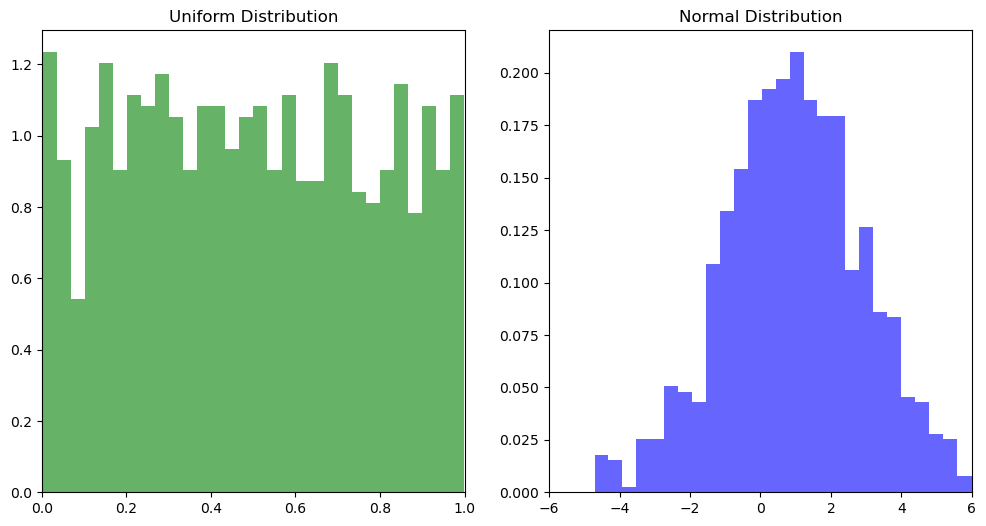

In [13]:
# 可视化均匀分布和转换后的正态分布
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 均匀分布的直方图
axs[0].hist(uniform_samples, bins=30, density=True, alpha=0.6, color='g')
axs[0].set_title('Uniform Distribution')
axs[0].set_xlim(0, 1)

# 正态分布的直方图
axs[1].hist(normal_samples, bins=30, density=True, alpha=0.6, color='b')
axs[1].set_title('Normal Distribution')
axs[1].set_xlim(-6, 6)

## histogram density estimator vs. KDE (kernel density estimator)

$$
\begin{split}
&\hat{p}_{\text{kde}}(\mathbf{x}) = \frac{1}{n} \sum_{i=1}^n \frac{1}{h^d} K \left( \frac{\|\mathbf{x} - \mathbf{x}^i\|}{h} \right)\\
&K(u) = \frac{1}{\sqrt{2\pi}} e^{-\frac{u^2}{2}}
\end{split}
$$

- $h$: bandwidth, $d$: dimension
- 核密度估计（KDE）是一种常用的概率密度估计方法。它通过核函数（如高斯核）对每个数据点进行平滑处理，从而生成连续的概率密度函数。
    - 计算 $\hat p(x)$ 时（任给一个 $x$，算其 pdf），所有的观测数据点都要对其计算平滑；
- 越多的数据点离要估计的点x越近，其概率则越大

In [14]:
from scipy.stats import gaussian_kde

In [16]:
# 生成随机样本数据
np.random.seed(42)
data = np.random.normal(0, 1, 1000)

# 直方图密度估计
hist_density, bins = np.histogram(data, bins=30, density=True)
bin_centers = (bins[1:] + bins[:-1]) * 0.5

(array([0.00422893, 0.        , 0.01268678, 0.01268678, 0.02537356,
        0.05497605, 0.0803496 , 0.15647028, 0.16915706, 0.23259096,
        0.31716949, 0.4144348 , 0.32139842, 0.3975191 , 0.43135051,
        0.36368768, 0.35522983, 0.23681989, 0.19030169, 0.13109672,
        0.11840994, 0.09726531, 0.05074712, 0.01268678, 0.02960249,
        0.00422893, 0.00422893, 0.        , 0.        , 0.00422893]),
 array([-3.24126734, -3.00480071, -2.76833408, -2.53186746, -2.29540083,
        -2.0589342 , -1.82246757, -1.58600095, -1.34953432, -1.11306769,
        -0.87660106, -0.64013444, -0.40366781, -0.16720118,  0.06926545,
         0.30573208,  0.5421987 ,  0.77866533,  1.01513196,  1.25159859,
         1.48806521,  1.72453184,  1.96099847,  2.1974651 ,  2.43393172,
         2.67039835,  2.90686498,  3.14333161,  3.37979824,  3.61626486,
         3.85273149]),
 <BarContainer object of 30 artists>)

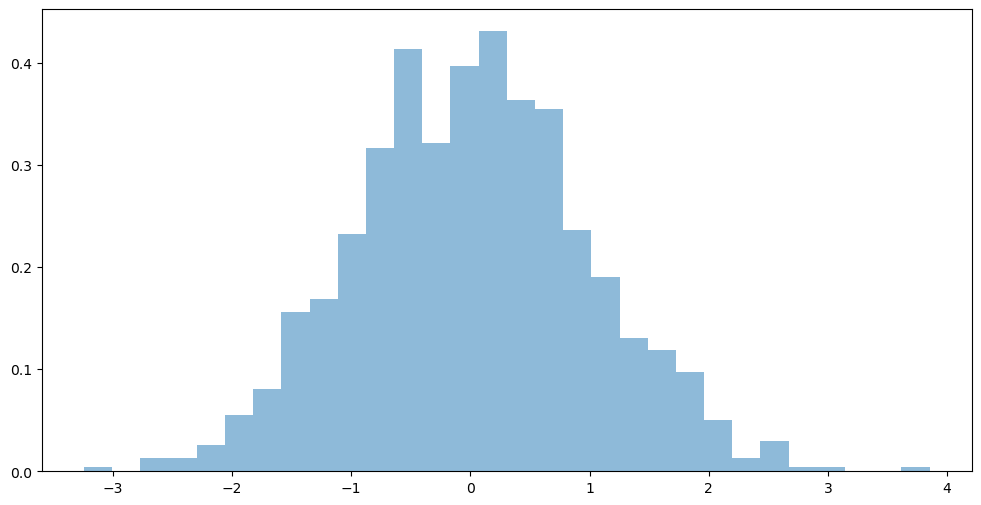

In [17]:
x = np.linspace(-4, 4, 1000)
plt.figure(figsize=(12, 6))
plt.hist(data, bins=30, density=True, alpha=0.5, label='Histogram Density')

In [25]:
# x^i
kde = gaussian_kde(data, bw_method=0.3)

In [22]:
callable(kde)

True

In [27]:
kde(0)

array([0.38946459])

In [24]:
# x
x = np.linspace(-4, 4, 1000)
density_estimate = kde(x)

In [30]:
def my_kde(data, x, h=0.3, d=1):
    def K(u):
        return 1/np.sqrt(2*np.pi) * np.exp(-0.5*u**2)
    return np.mean(1/(h**d)*K(np.abs(data - x)/h))

In [33]:
my_kde(data, 0)

0.38889135648902423

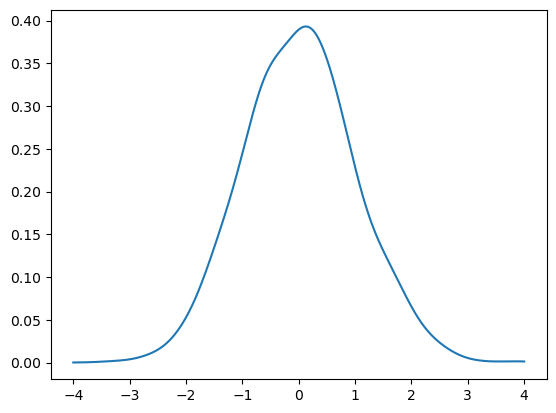

In [26]:
plt.plot(x, density_estimate, '-', label='Kernel Density Estimator')

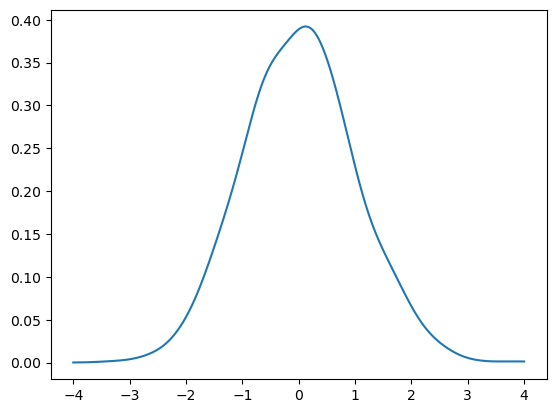

In [36]:
plt.plot(x, [my_kde(data, t) for t in x ], '-', label='Kernel Density Estimator')